In [1]:
import numpy as np
import matplotlib.pyplot as plt

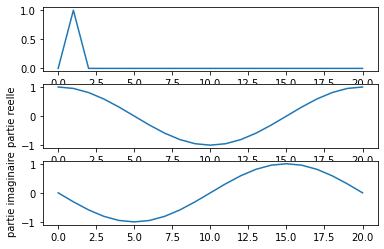

In [2]:
n = 20

# definition de a
a = np.zeros(n)
a[1] = 1

# visualisation de a
# on ajoute a droite la valeur de gauche pour la periodicite
plt.subplot(311)
plt.plot( np.append(a, a[0]) )

# calcul de A
A = np.fft.fft(a)

# visualisation de A
# on ajoute a droite la valeur de gauche pour la periodicite
B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("partie imaginaire")

plt.show()